# Project 01 Customer Service Requests Analysis

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 01 : Import a 311 NYC service request

In [1]:
#Import the required libraries
import pandas as pd

In [2]:
#Import the raw dataset
raw_csv = pd.read_csv("S:\\SandeepG\\Official\\DataScience\\SimpliLearn\\Data Science with Python\\Projects\\Project 01 - NYC 311\\311_Service_Requests_from_2010_to_Present.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# let's print the columns
raw_csv.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
# let's see sample data
raw_csv.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
# load the data in dataframe
df = pd.DataFrame(raw_csv)

In [7]:
# print no of rows and columns
df.shape

(300698, 53)

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 02 : Convert the columns ‘Created Date’ and Closed Date’ to datetime  

In [8]:
# analyse data types for each columns
print(df['Created Date'].dtype)
print(df['Closed Date'].dtype)

object
object


In [9]:
df['Created Date']= pd.to_datetime(df['Created Date']) 
df['Closed Date']= pd.to_datetime(df['Closed Date']) 

In [10]:
print(df['Created Date'].dtype)
print(df['Closed Date'].dtype)

datetime64[ns]
datetime64[ns]


#### <font color=blue>Create a new column ‘Request_Closing_Time’

In [11]:
# Create new column Request_Closing_Time
import numpy as np
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']
df['Request_Closing_Time_InDays'] = round(df['Request_Closing_Time']/np.timedelta64(1,'D'),2)

In [15]:
# check if missing values are handled well
df[df['Closed Date'].isnull()][['Created Date', 'Closed Date', 'Request_Closing_Time', 'Request_Closing_Time_InDays']].head()

,Created Date,Closed Date,Request_Closing_Time,Request_Closing_Time_InDays
416,2015-12-31 14:16:04,NaT,NaT,NaN
611,2015-12-31 09:58:06,NaT,NaT,NaN
1648,2015-12-30 05:13:42,NaT,NaT,NaN
1816,2015-12-29 22:44:50,NaT,NaT,NaN
1965,2015-12-29 19:09:13,NaT,NaT,NaN


In [16]:
df[['Created Date', 'Closed Date', 'Request_Closing_Time', 'Request_Closing_Time_InDays']].head()

,Created Date,Closed Date,Request_Closing_Time,Request_Closing_Time_InDays
0,2015-12-31 23:59:45,2016-01-01 00:55:00,00:55:15,0.04
1,2015-12-31 23:59:44,2016-01-01 01:26:00,01:26:16,0.06
2,2015-12-31 23:59:29,2016-01-01 04:51:00,04:51:31,0.20
3,2015-12-31 23:57:46,2016-01-01 07:43:00,07:45:14,0.32
4,2015-12-31 23:56:58,2016-01-01 03:24:00,03:27:02,0.14


<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 03 : Provide major insights/patterns 

In [17]:
# let's segreggate by Agency Name
df.groupby(['Agency Name']).count().sort_values(by=['Unique Key'], inplace=False, ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_InDays
Agency Name,,,,,,,,,,,,,,,,,,,,,
New York City Police Department,300690,300690,298527,300690,300690,294776,300566,298082,256286,256286,...,213,213,0,1,2,297157,297157,297157,298527,298527
Internal Affairs Bureau,6,6,6,6,6,6,0,0,0,0,...,0,0,0,0,0,0,0,0,6,6
NYPD,2,2,1,2,2,2,1,1,2,2,...,0,0,0,0,0,1,1,1,1,1


### <font color=red> <u>Insight 01</u> : 
#### <font color=red>Above confirms that 99.99% (300690 out of 300698) calls are assigned to "New York City Police Department". We can either filter out other Agency Name rows or keep it. Either way, it is not expected to impact any inferences.

In [18]:
# let's segreggate Complaint Types
df.groupby(['Complaint Type']).count().sort_values(by=['Unique Key'], inplace=False, ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_InDays
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Blocked Driveway,77044,77044,76810,77044,77044,77044,77007,76761,75734,75734,...,0,0,0,0,0,76723,76723,76723,76810,76810
Illegal Parking,75361,75361,74532,75361,75361,75361,75326,74318,62627,62627,...,0,0,0,0,0,74066,74066,74066,74532,74532
Noise - Street/Sidewalk,48612,48612,48076,48612,48612,48612,48601,48000,40290,40290,...,0,0,0,0,0,47793,47793,47793,48076,48076
Noise - Commercial,35577,35577,35247,35577,35577,35577,35571,35199,32765,32765,...,0,0,0,0,0,35176,35176,35176,35247,35247
Derelict Vehicle,17718,17718,17588,17718,17718,17718,17710,17547,14899,14899,...,10,10,0,0,0,17519,17519,17519,17588,17588
Noise - Vehicle,17083,17083,17033,17083,17083,17083,17080,17029,12340,12340,...,0,0,0,0,0,16873,16873,16873,17033,17033
Animal Abuse,7778,7778,7768,7778,7778,7778,7775,7767,6615,6615,...,0,0,0,0,0,7747,7747,7747,7768,7768
Traffic,4498,4498,4496,4498,4498,4498,4493,4496,942,942,...,186,186,0,0,0,4475,4475,4475,4496,4496
Homeless Encampment,4416,4416,4416,4416,4416,0,4407,4415,2969,2969,...,17,17,0,0,0,4367,4367,4367,4416,4416


#### <font color=green>Above confirms that Blocked Driveway, Illegal Parking and Noise (any type) are the big buckets of complaint. Let's categorize complaint type into limited bins and then visualize it.

In [15]:
# to better visualize the Complaint Type, let's create a new column that captures complaint types with substaintial value
def assignComplaintCategory(complaintType):
    if(complaintType == 'Blocked Driveway'):
        return 'BlockedDriveway'
    elif(complaintType == 'Illegal Parking'):
        return 'IllegalParking'
    elif(complaintType == 'Noise - Street/Sidewalk'):
        return 'NoiseStreetSidewalk'
    elif(complaintType == 'Noise - Commercial'):
        return 'NoiseCommercial'
    elif(complaintType == 'Derelict Vehicle'):
        return 'DerelictVehicle'
    elif(complaintType == 'Noise - Vehicle'):
        return 'NoiseVehicle'    
    else:
        return 'Other'

In [16]:
# adding a new column for better visualization
df['Complaint Category'] = df.apply(lambda x: assignComplaintCategory(x['Complaint Type']),axis=1)

In [17]:
# confirm that new column Complaint Category is added and populated
df[['Complaint Type','Complaint Category']]

,Complaint Type,Complaint Category
0,Noise - Street/Sidewalk,NoiseStreetSidewalk
1,Blocked Driveway,BlockedDriveway
2,Blocked Driveway,BlockedDriveway
3,Illegal Parking,IllegalParking
4,Illegal Parking,IllegalParking
...,...,...
300693,Noise - Commercial,NoiseCommercial
300694,Blocked Driveway,BlockedDriveway
300695,Noise - Commercial,NoiseCommercial
300696,Noise - Commercial,NoiseCommercial


In [18]:
# let's group on new column Complaint Category
dfCompCat = df.groupby(['Complaint Category']).count().sort_values(by=['Unique Key'], inplace=False, ascending=False)

In [19]:
# let's see the sample
dfCompCat

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_InDays
Complaint Category,,,,,,,,,,,,,,,,,,,,,
BlockedDriveway,77044,77044,76810,77044,77044,77044,77044,77007,76761,75734,...,0,0,0,0,0,76723,76723,76723,76810,76810
IllegalParking,75361,75361,74532,75361,75361,75361,75361,75326,74318,62627,...,0,0,0,0,0,74066,74066,74066,74532,74532
NoiseStreetSidewalk,48612,48612,48076,48612,48612,48612,48612,48601,48000,40290,...,0,0,0,0,0,47793,47793,47793,48076,48076
NoiseCommercial,35577,35577,35247,35577,35577,35577,35577,35571,35199,32765,...,0,0,0,0,0,35176,35176,35176,35247,35247
Other,29303,29303,29248,29303,29303,29303,23389,29272,29229,17633,...,203,203,0,1,2,29008,29008,29008,29248,29248
DerelictVehicle,17718,17718,17588,17718,17718,17718,17718,17710,17547,14899,...,10,10,0,0,0,17519,17519,17519,17588,17588
NoiseVehicle,17083,17083,17033,17083,17083,17083,17083,17080,17029,12340,...,0,0,0,0,0,16873,16873,16873,17033,17033


In [20]:
# let's cut the first column of unique key and put in dictionary for plt iteration
dictCompCat = dfCompCat.iloc[:,0].to_dict()

In [21]:
# let's see the dict value
dictCompCat

{'BlockedDriveway': 77044,
 'IllegalParking': 75361,
 'NoiseStreetSidewalk': 48612,
 'NoiseCommercial': 35577,
 'Other': 29303,
 'DerelictVehicle': 17718,
 'NoiseVehicle': 17083}

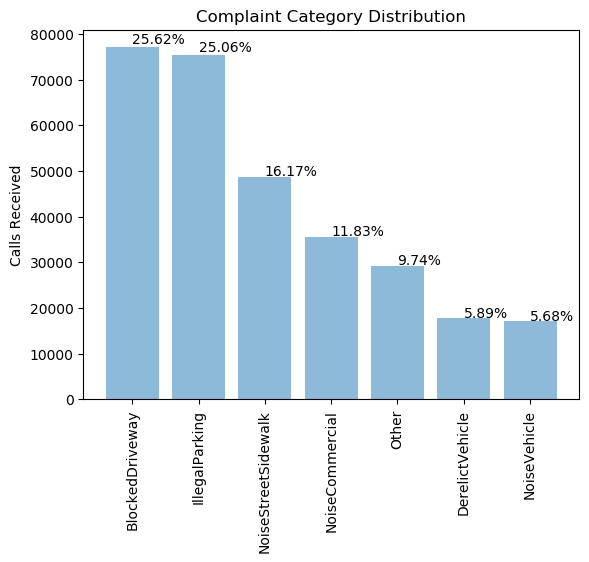

In [23]:
# let's visualize the complaint categorization
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = dictCompCat.keys()
y_pos = np.arange(len(objects))
callRcvd = dictCompCat.values()

total = sum(dictCompCat.values())

for index, value in enumerate(callRcvd):
    pctValue = str(round((value/total)*100,2)) + '%'
    plt.text(index, value + (value * 0.01), pctValue)
    
plt.bar(y_pos, callRcvd, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Calls Received')
plt.title('Complaint Category Distribution')

plt.show()

### <font color=red> <u>Insight 02</u> : 
#### <font color=red>Above confirms that 50% of Complaint Types are either Blocked Driveway or Illegal Parking. The bar chart list the other type of big buckets too.

In [24]:
# let's see the count of different Statuses
df.groupby(['Status']).count().sort_values(by=['Unique Key'], inplace=False, ascending=False).iloc[:,0]

Status
Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Unique Key, dtype: int64

### <font color=red> <u> Insight 03 </u> : 
#### <font color=red>Above confirms that there are 1439 open calls and 786 are being worked upon(assigned).

In [25]:
# let's cut a dataframe based on City and Complaint Type to see pattern, if any
dfCityCompType = df.groupby(['City', 'Complaint Type']).count().sort_values(by=['Unique Key'], inplace=False, ascending=False).iloc[:,0]

In [26]:
# converting series to dataframe so that it can be visualized in heatmap
dfCityCompType = pd.DataFrame(dfCityCompType)

# renaming aggregate column
dfCityCompType.rename(columns = {'Unique Key': 'Complaint Count'}, inplace=True)

#filtering rows to keep big buckets
dfCityCompType = dfCityCompType[dfCityCompType['Complaint Count'] > 1000]

dfCityCompType

Complaint Count
City                Complaint Type                          
BROOKLYN            Blocked Driveway                   28148
                    Illegal Parking                    27462
NEW YORK            Noise - Street/Sidewalk            20433
                    Noise - Commercial                 14550
BROOKLYN            Noise - Street/Sidewalk            13356
BRONX               Blocked Driveway                   12755
NEW YORK            Illegal Parking                    12128
BROOKLYN            Noise - Commercial                 11463
BRONX               Noise - Street/Sidewalk             8892
                    Illegal Parking                     7859
NEW YORK            Noise - Vehicle                     5485
BROOKLYN            Derelict Vehicle                    5181
                    Noise - Vehicle                     5177
STATEN ISLAND       Illegal Parking                     4886
BRONX               Noise - Vehicle                     3396
JAMAICA             Blocked Driveway                    2818
FLUSHING            Blocked Driveway                    2795
NEW YORK            Homeless Encampment                 2775
CORONA              Blocked Driveway                    2761
ASTORIA             Blocked Driveway                    2618
BRONX               Noise - Commercial                  2434
NEW YORK            Vending                             2399
BROOKLYN            Animal Abuse                        2394
STATEN ISLAND       Blocked Driveway                    2142
NEW YORK            Blocked Driveway                    2072
BRONX               Derelict Vehicle                    1953
RIDGEWOOD           Illegal Parking                     1842
FLUSHING            Illegal Parking                     1829
STATEN ISLAND       Derelict Vehicle                    1766
RIDGEWOOD           Blocked Driveway                    1694
WOODSIDE            Blocked Driveway                    1613
BROOKLYN            Noise - Park                        1555
NEW YORK            Traffic                             1549
SOUTH RICHMOND HILL Blocked Driveway                    1548
NEW YORK            Animal Abuse                        1525
ELMHURST            Blocked Driveway                    1446
JAMAICA             Illegal Parking                     1421
BRONX               Animal Abuse                        1415
EAST ELMHURST       Blocked Driveway                    1408
ASTORIA             Noise - Commercial                  1293
OZONE PARK          Blocked Driveway                    1259
NEW YORK            Noise - Park                        1211
BROOKLYN            Traffic                             1085
ASTORIA             Illegal Parking                     1068
WOODHAVEN           Blocked Driveway                    1060

In [27]:
# let's visualize City and Complaint Type in a heatmap to understand what are the frequence complaints
# that are registered across different cities
heatmap_data = pd.pivot_table(dfCityCompType, values= 'Complaint Count', 
                     index=['Complaint Type'], 
                     columns='City')

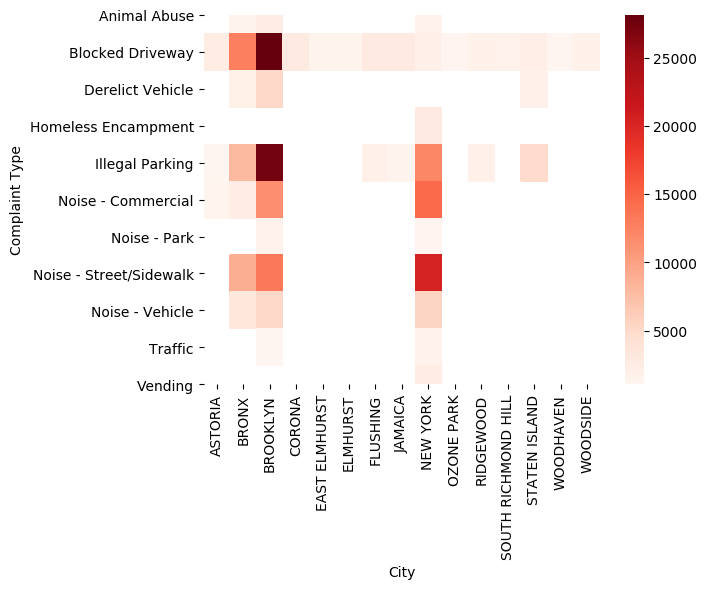

In [28]:
import seaborn as sns
sns.heatmap(heatmap_data, cmap="Reds")

### <font color=red> <u>Insight 04</u> : 
#### <font color=red>Above confirms that Blocked Driveway and Illegal Parking are biggest in Brooklyn while Noise - Street/Sidewalk is biggest in New York.

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 04.	Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [29]:
# let's group the dataset by Complaint and Location Type and sort by closing time
dfCompTypeRCT = df.groupby(['Complaint Type', 'Location Type'])[['Request_Closing_Time_InDays']].mean().sort_values(by=['Request_Closing_Time_InDays'], inplace=False, ascending=False)
dfCompTypeRCT

,,Request_Closing_Time_InDays
Complaint Type,Location Type,
Animal in a Park,Park,14.030000
Derelict Vehicle,Roadway Tunnel,0.750000
Graffiti,Street/Sidewalk,0.501600
Derelict Vehicle,Highway,0.343077
Urinating in Public,Club/Bar/Restaurant,0.330000
...,...,...
Posting Advertisement,Street/Sidewalk,0.075759
Panhandling,Park/Playground,0.050000
Urinating in Public,Subway Station,0.047500


<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 05.01	Hypothesis. Whether the average response time across complaint types is similar or not (overall)
    H0 : there is no relation between complaint type and response time  (p-value > 0.05)
    H1 : there is relation between complaint type and response time  (p-value <= 0.05)

In [30]:
# we will apply chi-square test to perform above hypothesis testing.
# for this, converting Request_Closing_Time_InDays to categorical set

def categorizeReqClosingTime(ReqClosingTimeInDays):
    if ReqClosingTimeInDays > 7:
        return 'More than one week'
    elif ReqClosingTimeInDays > 1:
        return 'More than one day'
    elif ReqClosingTimeInDays > 0.5:
        return 'More than half day'
    else:
        return 'Couple of Hours'
   

In [31]:
# add new column to enable chi-sqaure test
df['RCT Category'] = df.apply(lambda x: categorizeReqClosingTime(x['Request_Closing_Time_InDays']),axis=1)

In [32]:
df.head()[['Request_Closing_Time_InDays', 'RCT Category']]

,Request_Closing_Time_InDays,RCT Category
0,0.04,Couple of Hours
1,0.06,Couple of Hours
2,0.20,Couple of Hours
3,0.32,Couple of Hours
4,0.14,Couple of Hours


In [33]:
# let's change the data to crosstabe so that chi-sq can be applied
crossTabData = pd.crosstab(df['Complaint Type'], df['RCT Category'])
crossTabData

RCT Category,Couple of Hours,More than half day,More than one day,More than one week
Complaint Type,,,,
Agency Issues,6,0,0,0
Animal Abuse,7130,510,137,1
Animal in a Park,0,0,0,1
Bike/Roller/Skate Chronic,413,10,4,0
Blocked Driveway,71970,4157,917,0
Derelict Vehicle,14844,1963,905,6
Disorderly Youth,277,8,1,0
Drinking,1228,43,9,0
Ferry Complaint,2,0,0,0


In [34]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = crossTabData

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
#print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0 : there is no relation between complaint type and response time)')
else:
    print('Independent (reject H1 : there is relation between complaint type and response time )')

print('\n')

# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0 : there is no relation between complaint type and response time)')
else:
    print('Independent (reject H1 : there is relation between complaint type and response time )')

dof=69
probability=0.950, critical=89.391, stat=36151.418
Dependent (reject H0 : there is no relation between complaint type and response time)


significance=0.050, p=0.000
Dependent (reject H0 : there is no relation between complaint type and response time)


### <font color=red> <u>Hypothesis Testing Result</u> : 
#### <font color=red>Above confirms that there IS relationship between the complaint type and response time.

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 05.02	Hypothesis. Are the type of complaint or service requested and location related?
    H0 : there is no relation between complaint or service requested and location  (p-value > 0.05)
    H1 : there is relation between complaint or service requested and location  (p-value <= 0.05)

In [35]:
# let's see sample data
df.head()[['Complaint Type', 'Location Type']]

,Complaint Type,Location Type
0,Noise - Street/Sidewalk,Street/Sidewalk
1,Blocked Driveway,Street/Sidewalk
2,Blocked Driveway,Street/Sidewalk
3,Illegal Parking,Street/Sidewalk
4,Illegal Parking,Street/Sidewalk


In [36]:
# let's change the data to crosstabe so that chi-sq can be applied
crossTabData = pd.crosstab(df['Complaint Type'], df['Location Type'])
crossTabData

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Ferry,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Terminal,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,,,
Animal Abuse,0,0,62,0,0,93,0,0,123,110,227,5085,0,522,1531,22,0,0
Animal in a Park,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,0,26,0,53,348,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77007,0,0,0
Derelict Vehicle,0,0,0,0,14,0,0,0,0,0,0,0,5,0,17614,0,0,77
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,0,77,0,8,201,0,0,0
Drinking,0,366,0,0,0,0,0,0,98,0,0,291,0,90,434,0,0,0
Ferry Complaint,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Graffiti,0,0,0,0,0,0,0,0,0,0,0,56,0,32,25,0,0,0


In [37]:
# contingency table
table = crossTabData

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
#print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0 : there is no relation between complaint or service requested and location)')
else:
    print('Independent (reject H1 : there is relation between complaint or service requested and location)')

print('\n')

# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0 : there is no relation between complaint or service requested and location)')
else:
    print('Independent (reject H1 : there is no relation between complaint or service requested and location)')

dof=374
probability=0.950, critical=420.094, stat=1638407.581
Dependent (reject H0 : there is no relation between complaint or service requested and location)


significance=0.050, p=0.000
Dependent (reject H0 : there is no relation between complaint or service requested and location)


### <font color=red> <u>Hypothesis Testing Result</u> : 
#### <font color=red>Above confirms that there IS relationship between complaint or service requested and location.

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>